In [737]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [746]:
# ds = "eurosat"
ds = "stl10"
ds_short = "es" if ds == "eurosat" else "stl10"

N = 4

if N == 1:
    col_name = "precision_weighted"
    file_name = f"pcw_{ds_short}.png"
    label_name = "Precision weighted"
elif N == 2:
    col_name = "f1_weighted"
    file_name = f"f1w_{ds_short}.png"
    label_name = "F1 weighted"
elif N == 3:
    col_name = "balanced_accuracy"
    file_name = f"bac_{ds_short}.png"
    label_name = "Balanced accuracy"
elif N == 4:
    col_name = "accuracy"
    file_name = f"ac_{ds_short}.png"
    label_name = "Accuracy"

In [747]:
edges_fixed = pd.read_csv(f"../data/results/edges_fixed_{ds}.csv", index_col=0)
edges_proba = pd.read_csv(f"../data/results/edges_proba_{ds}.csv", index_col=0)
losses_proba = pd.read_csv(f"../data/results/losses_proba_{ds}.csv", index_col=0)
losses_fixed = pd.read_csv(f"../data/results/losses_fixed_{ds}.csv", index_col=0)
random = pd.read_csv(f"../data/results/random_{ds}.csv", index_col=0)

In [748]:
random.describe().round(4)

,accuracy,balanced_accuracy,recall_weighted,precision_weighted,f1_weighted
count,50.0000,50.0000,50.0000,50.0000,50.0000
mean,0.5982,0.5982,0.5982,0.6078,0.5977
std,0.0099,0.0099,0.0099,0.0082,0.0100
min,0.5626,0.5626,0.5626,0.5922,0.5589
25%,0.5914,0.5914,0.5914,0.6029,0.5921
50%,0.5982,0.5982,0.5982,0.6083,0.5978
75%,0.6050,0.6050,0.6050,0.6131,0.6037
max,0.6159,0.6159,0.6159,0.6260,0.6178


In [740]:
concat = pd.concat(
    [
        edges_fixed[col_name], 
        edges_proba[col_name],
        losses_proba[col_name],
        losses_fixed[col_name],
        random[col_name]
    ]
)

df = pd.DataFrame(
    {
        col_name: concat,
        "x": 
            ["EdgDtrm"] * 50 +
            ["EdgStch"] * 50 +
            ["MdlDtrm"] * 50 +
            ["MdlStch"] * 50 +
            ["Rndm"] * 50
    }
)

In [741]:
dff = pd.DataFrame(
    {
        "EdgDtrm": edges_fixed[col_name], 
        "EdgStch": edges_proba[col_name],
        "MdlDtrm": losses_proba[col_name],
        "MdlStch": losses_fixed[col_name],
        "Rndm": random[col_name]
    }
)

matrix = np.zeros((5, 5))

for idx1, mm in enumerate(dff.columns):
    for idx2, mm2 in enumerate(dff.columns):
        tt = stats.ttest_ind(a=dff[mm], b=dff[mm2], equal_var=True)
        matrix[idx1][idx2] = tt.pvalue
        
        if idx1 == idx2:
            matrix[idx1][idx2] = None

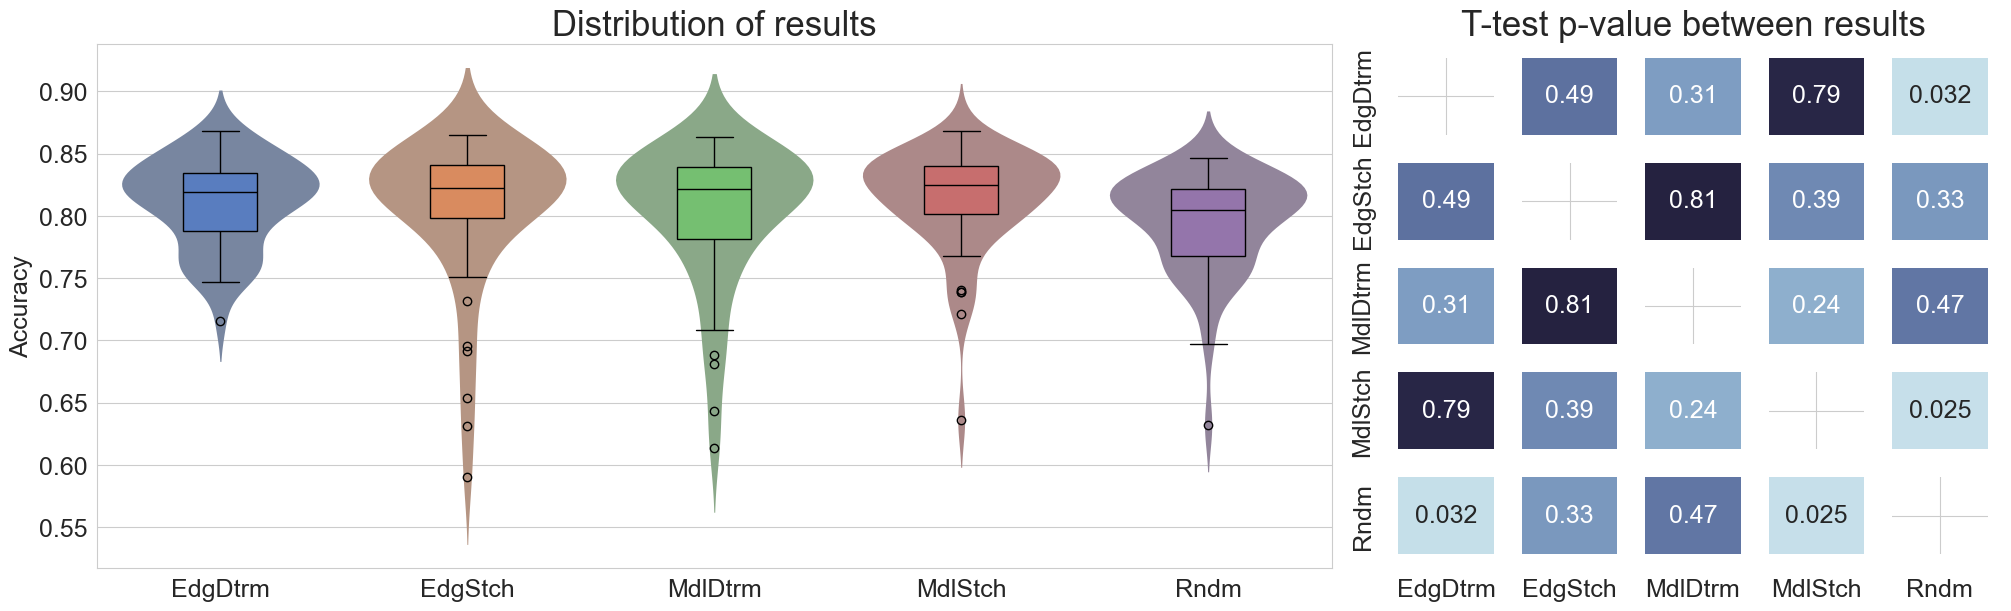

In [742]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 6), constrained_layout=True, width_ratios=[2, 1])

sns.violinplot(data=df, x="x", y=col_name, inner=None, linewidth=0, saturation=0.3, palette='muted', hue="x", legend=False, ax=axs[0])

PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'},
}

sns.boxplot(
    data=df, x="x", y=col_name, width=0.3, ax=axs[0], palette='muted', hue="x", legend=False, flierprops={"markeredgecolor": 'black'}, **PROPS
)
axs[0].set_ylabel(label_name, fontsize=18)
axs[0].set_xlabel("")
axs[0].set_title("Distribution of results", fontsize=25)
axs[0].tick_params(labelsize=18)


sns.heatmap(
    matrix, annot=True, xticklabels=dff.columns, yticklabels=dff.columns,
    mask=np.isnan(matrix), 
    cmap=sns.color_palette("ch:start=.1,rot=-.2", as_cmap=True),
    ax=axs[1],
    linewidths=20,
    cbar=False,
    annot_kws={"size": 18},
)
axs[1].tick_params(labelsize=18)
axs[1].set_title("T-test p-value between results", fontsize=25)

plt.grid("off")
# plt.savefig(f"/Users/dbugajny/Desktop/{file_name}")